Fault Motors Detection in Hexapod Robots Using Machine Learning Models ( Detect Two Joints )

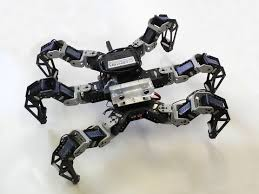                   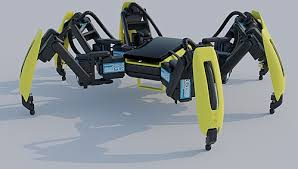

Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

Read Dataset

In [2]:
df=pd.read_csv('/kaggle/input/fault-detection-in-hexapod-robot-jointstwo-joint/Hexapod_Two_Joint.csv')
df

,Label,X,Y,Z,slop(x),slop(x/z),slop(1/z),slop(1/x),slop(z/x),slop(z)
0,4&12,1043.247379,0.578427,1.135227,-1.015551,-2.403517,-2.366713,0.985,-0.416057,-0.422527
1,14&17,998.117346,0.706060,-4.829712,-1.638768,8.928183,5.448107,0.610,0.112005,0.183550
2,7&11,706.137601,0.672181,34.843339,-1.655653,-9.887034,-5.971682,0.604,-0.101143,-0.167457
3,4&7,723.366939,0.632543,44.063644,-1.660461,-7.363953,-4.434885,0.602,-0.135797,-0.225485
4,8&11,186.777916,0.705599,-5.826142,-1.655422,133.447965,80.612656,0.604,0.007494,0.012405
...,...,...,...,...,...,...,...,...,...,...
145678,7&13,-13.545789,0.613260,161.939423,-1.451023,-6.550569,-4.514448,0.689,-0.152659,-0.221511
145679,1&16,239.695937,0.694357,-87.300028,-1.832110,9.137022,4.987158,0.546,0.109445,0.200515
145680,9&16,-35.688922,0.579847,-111.448053,-1.621038,9.648461,5.952027,0.617,0.103643,0.168010
145681,7&10,922.696665,0.694321,18.821401,-1.599588,-6.282749,-3.927730,0.625,-0.159166,-0.254600


In [3]:
# Checking Null values for Dataset
df.isnull().sum()*100/df.shape[0]

Label        0.0
X            0.0
Y            0.0
Z            0.0
slop(x)      0.0
slop(x/z)    0.0
slop(1/z)    0.0
slop(1/x)    0.0
slop(z/x)    0.0
slop(z)      0.0
dtype: float64

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145683 entries, 0 to 145682
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Label      145683 non-null  object 
 1   X          145683 non-null  float64
 2   Y          145683 non-null  float64
 3   Z          145683 non-null  float64
 4   slop(x)    145683 non-null  float64
 5   slop(x/z)  145683 non-null  float64
 6   slop(1/z)  145683 non-null  float64
 7   slop(1/x)  145683 non-null  float64
 8   slop(z/x)  145683 non-null  float64
 9   slop(z)    145683 non-null  float64
dtypes: float64(9), object(1)
memory usage: 11.1+ MB
None


In [5]:
print(df.describe())

                   X              Y              Z        slop(x)  \
count  145683.000000  145683.000000  145683.000000  145683.000000   
mean      547.229349       0.677938       4.755465      -0.007167   
std       519.657763       0.062754     102.667169      40.280980   
min      -764.340995       0.560029    -683.670336     -52.656955   
25%       118.304290       0.618100     -17.516115      -1.715288   
50%       703.139003       0.693653       1.020875      -1.615139   
75%      1039.871378       0.744543      29.779207      -0.793610   
max      1107.049609       0.916739     763.593457    1809.990995   

           slop(x/z)      slop(1/z)      slop(1/x)      slop(z/x)  \
count  145683.000000  145683.000000  145683.000000  145683.000000   
mean        4.039842       3.460055       0.437124       2.868594   
std       627.702130     351.344862     118.038656     197.757130   
min    -73479.800020  -40000.000010  -14100.000000  -11799.590470   
25%        -8.277077      -4.9931

In [8]:
classes = set(df['Label'])
print(classes)
df.shape

{'12&16', '1&14', '7&10', '7&17', '8&16', '15&16', '10&12', '2&7', '3&6', '3&12', '1&4', '14&16', '2&8', '7&13', '2&14', '3&13', '9&12', '6&13', '4&6', '4&14', '0&15', '0&17', '7&12', '1&5', '10&15', '10&16', '6&11', '1&6', '6&16', '6&17', '0&13', '6&10', '8&17', '5&11', '2&5', '9&11', '4&17', '9&17', '6&14', '2&10', '14&17', '3&5', '8&11', '5&6', '0&6', '8&9', '6&15', '11&15', '10&17', '3&15', '1&16', '12&17', '3&10', '12&14', '0&11', '2&4', '4&10', '10&13', '5&10', '8&15', '11&13', '1&8', '3&9', '4&13', '6&12', '0&5', '0&9', '7&8', '11&16', '4&12', '9&13', '10&11', '6&8', '8&10', '5&14', '12&15', '8&13', '3&11', '1&15', '9&14', '1&17', '0&8', '11&17', '9&15', '5&8', '7&11', '9&10', '8&12', '3&8', '0&2', '2&17', '5&13', '0&4', '13&14', '7&9', '3&4', '0&10', '2&16', '0&14', '11&14', '0&3', '11&12', '7&15', '2&15', '1&3', '1&7', '3&16', '8&14', '2&9', '13&16', '4&8', '10&14', '6&7', '5&16', '5&17', '7&14', '16&17', '0&16', '2&6', '1&2', '1&10', '1&9', '13&15', '12&13', '-1', '2&13', '3&

(145683, 10)

In [9]:
df

,Label,X,Y,Z,slop(x),slop(x/z),slop(1/z),slop(1/x),slop(z/x),slop(z)
0,4&12,1043.247379,0.578427,1.135227,-1.015551,-2.403517,-2.366713,0.985,-0.416057,-0.422527
1,14&17,998.117346,0.706060,-4.829712,-1.638768,8.928183,5.448107,0.610,0.112005,0.183550
2,7&11,706.137601,0.672181,34.843339,-1.655653,-9.887034,-5.971682,0.604,-0.101143,-0.167457
3,4&7,723.366939,0.632543,44.063644,-1.660461,-7.363953,-4.434885,0.602,-0.135797,-0.225485
4,8&11,186.777916,0.705599,-5.826142,-1.655422,133.447965,80.612656,0.604,0.007494,0.012405
...,...,...,...,...,...,...,...,...,...,...
145678,7&13,-13.545789,0.613260,161.939423,-1.451023,-6.550569,-4.514448,0.689,-0.152659,-0.221511
145679,1&16,239.695937,0.694357,-87.300028,-1.832110,9.137022,4.987158,0.546,0.109445,0.200515
145680,9&16,-35.688922,0.579847,-111.448053,-1.621038,9.648461,5.952027,0.617,0.103643,0.168010
145681,7&10,922.696665,0.694321,18.821401,-1.599588,-6.282749,-3.927730,0.625,-0.159166,-0.254600


In [10]:
df.shape

(145683, 10)

In [11]:
# Define feature matrix X and target vector y
y=df.pop('Label')
X=df[['X','Y','Z']] 

Scale the features

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the dataset into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
models_names = []
accuracies_of_models = []
f1_score_of_models = []

Building Machine Learning Models

1 - Logistic Regression

In [13]:
Logistic_Regression_model = LogisticRegression(max_iter=2000)
Logistic_Regression_model.fit(X_train,y_train)
y_pred = Logistic_Regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

models_names.append('Logistic Regression')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_pred,average='macro'))

Logistic Regression Accuracy: 0.6908398256512338


2 - Perceptron Model

In [14]:
Perceptron_model = Perceptron(max_iter=5000)
Perceptron_model.fit(X_train,y_train)

y_predicted_PER = Perceptron_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_PER)
print(f'Perceptron Accuracy: {accuracy}')
models_names.append('Perceptron')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_PER,average='macro'))

Perceptron Accuracy: 0.06366475615197172


3 - Stochastic Gradient Descent Model ( SGD )

In [15]:
SGD_model = SGDClassifier(max_iter=5000)
SGD_model.fit(X_train,y_train)


y_predicted_SGD = SGD_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_SGD)
print(f'SGD linear: {accuracy}')
models_names.append('SGD model')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_SGD,average='macro'))

SGD linear: 0.09383258399972544


4 - KNN Model

In [16]:
KNN_model = KNeighborsClassifier(n_neighbors=100)
KNN_model.fit(X_train,y_train)


y_predicted_KNN = KNN_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_KNN)
print(f'KNN: {accuracy}')
models_names.append('KNN model')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_KNN,average='macro'))

KNN: 0.8657720424202904


5 - GaussianNB Model

In [17]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train,y_train)

y_predicted_GNB = GaussianNB_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predicted_GNB)
print(f'GaussianNB Accuracy: {accuracy}')
models_names.append('GaussianNB_model')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_GNB,average='macro'))

GaussianNB Accuracy: 0.6763908432577136


6 - BernoulliNB Model

In [18]:
BernoulliNB_model = BernoulliNB()
BernoulliNB_model.fit(X_train,y_train)

y_predicted_BNB = BernoulliNB_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predicted_BNB)
print(f'BernoulliNB Accuracy: {accuracy}')
models_names.append('BernoulliNB_model')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_BNB,average='macro'))

BernoulliNB Accuracy: 0.038130212444657995


7 - Decision Tree Model

In [19]:
DecisionTree_model = DecisionTreeClassifier(max_depth=50,random_state=42)
DecisionTree_model.fit(X_train,y_train)

y_predicted_DT = DecisionTree_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predicted_DT)
print(f'Decision Tree Accuracy: {accuracy}')
models_names.append('Decision Tree')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_DT,average='macro'))

Decision Tree Accuracy: 0.9945087002779971


8 - Random Forest Model

In [20]:
rf_model = RandomForestClassifier(n_estimators=25,max_depth=50,random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')
models_names.append('Random Forest')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_pred,average='macro'))

Random Forest Accuracy: 0.9928956309846587


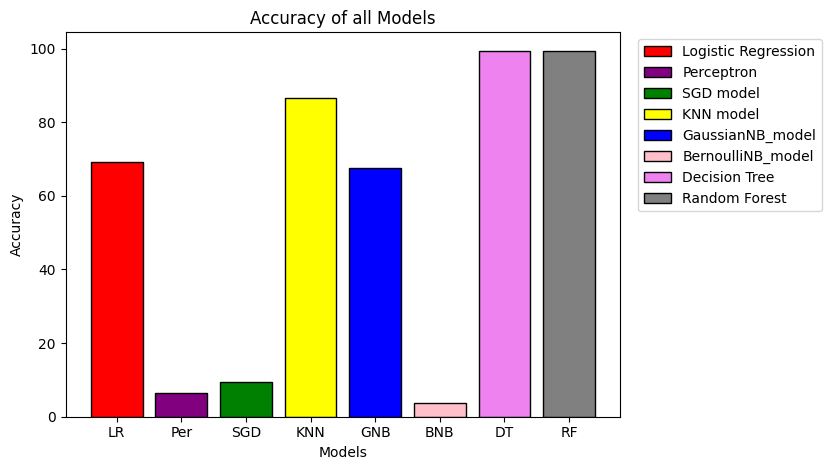

In [21]:
plt.bar(['LR', 'Per', 'SGD', 'KNN', 'GNB', 'BNB', 'DT', 'RF'],
        accuracies_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()

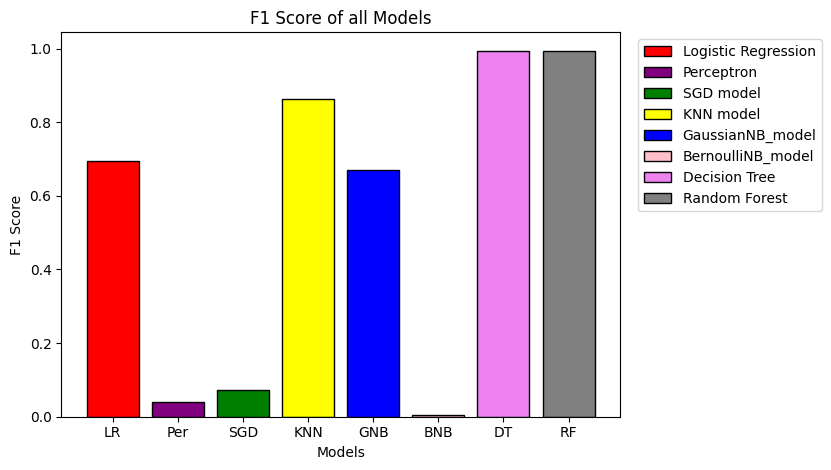

In [22]:
plt.bar(['LR', 'Per', 'SGD', 'KNN','GNB', 'BNB', 'DT', 'RF'],
        f1_score_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()